In [20]:
import polars as pl
import matplotlib.pyplot as plt

In [51]:
customHeaders = ["Rank","ExecutionTime","IdleTime"]
df15 = pl.read_csv(r"mpi_results_queen-15-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df10 = pl.read_csv(r"mpi_results_queen-10-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df13 = pl.read_csv(r"mpi_results_queen-13-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df16 = pl.read_csv(r"mpi_results_queen-16-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)


In [44]:
def plot_idleTime(df: pl.DataFrame, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current active axis if none is provided
    ax.bar(df["Rank"], df["IdleTime"])
    ax.set_xlabel("Worker")
    ax.set_ylabel("Idle Time (s)")
    ax.set_title(f"N = {len(df['Rank'])}, depth = 2")
    ax.set_xticks(range(len(df["Rank"])))
    ax.set_xticklabels(df["Rank"])


In [58]:
df10.filter(pl.col("Rank") > 0)

Rank,ExecutionTime,IdleTime
i64,f64,f64
1,0.070579,0.064545
2,0.079955,0.073852
3,0.070704,0.053869
4,0.080379,0.073894
5,0.078854,0.067576
6,0.080266,0.071157
7,0.070599,0.061413
8,0.079985,0.074131
9,0.080386,0.066139


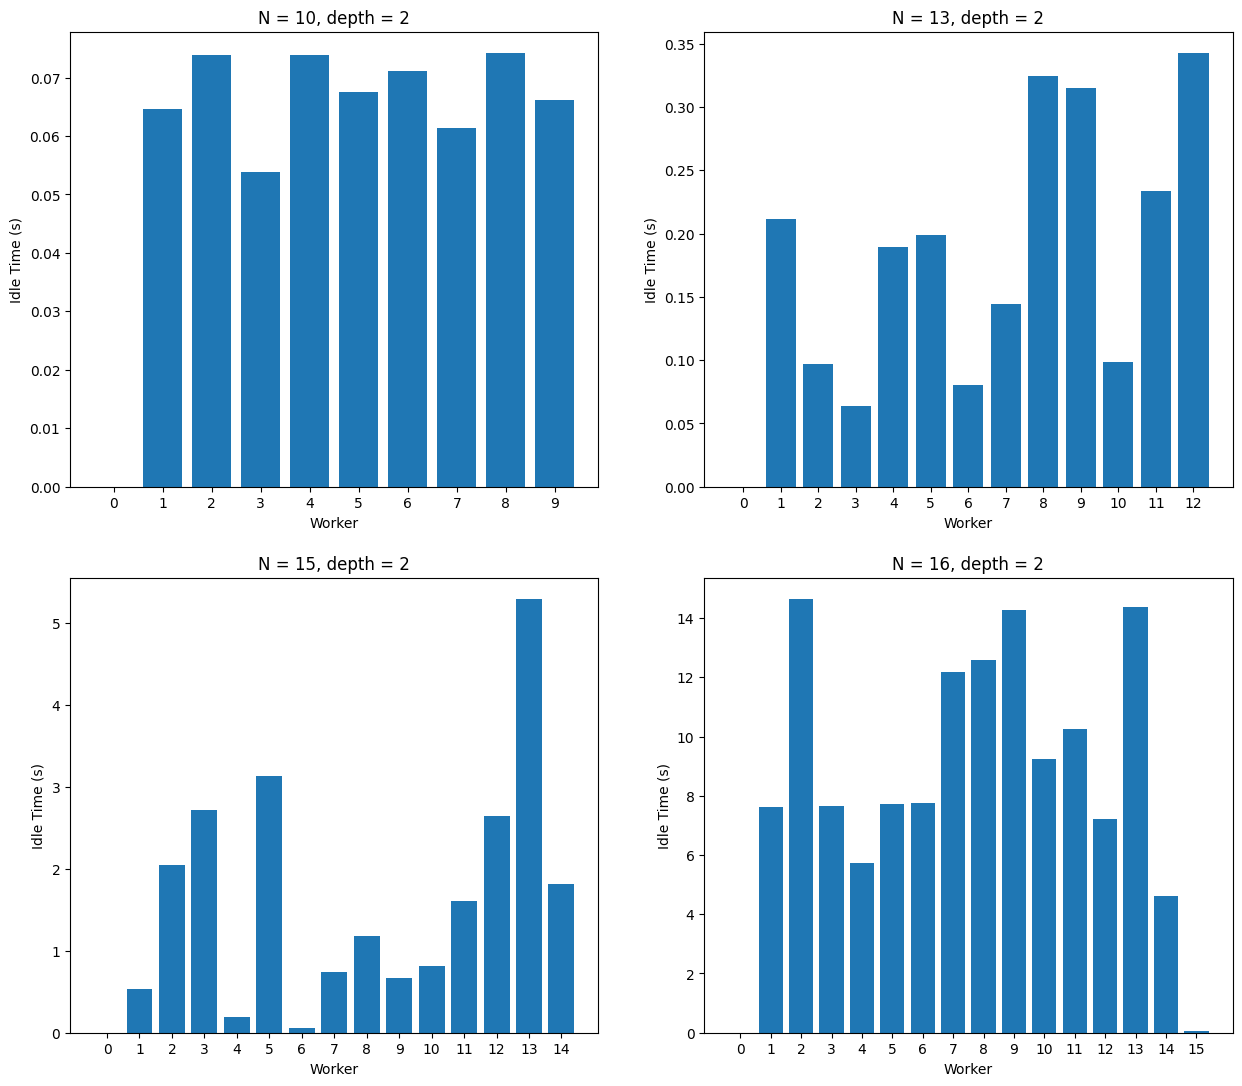

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
plot_idleTime(df10, ax=axes[0,0])
plot_idleTime(df13, ax=axes[0,1])
plot_idleTime(df15, ax=axes[1,0])
plot_idleTime(df16, ax=axes[1,1])

In [71]:
executions = []
queens = [10,13,15,16]
executions.append(df10.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())
executions.append(df13.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())
executions.append(df15.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())
executions.append(df16.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())


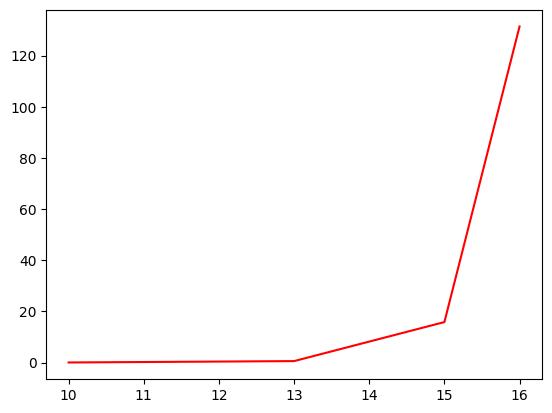

In [75]:
plt.plot(queens,executions,color="red")